In [1]:
import pandas as pd
import seaborn as sns
from FRA import *
import statsmodels.api as sm
import statsmodels.formula.api as smf

def dist(k, i):
    return np.abs(np.subtract(k, i)).sum()

In [2]:
data = pd.read_csv('../Data/humans_absent.csv')
data['Region'] = data['Region'].apply(lambda x: [int(y) for y in x[1:-1].split(',')])
data['RegionGo'] = data['RegionGo'].apply(lambda x: [int(y) for y in x[1:-1].split(',')])
data['Overlap'] = data['Overlap'].apply(lambda x: [int(y) for y in x[1:-1].split(' ')])
focals, strategies = create_regions_and_strategies(8)
complements = [[1 - x for x in sublist] for sublist in focals]
data['Dists'] = data['Region'].apply(lambda x: [dist(x, f) for f in focals])
data['Dists1'] = data['RegionGo'].apply(lambda x: [dist(x, f) for f in focals])
data['DistsO'] = data['Overlap'].apply(lambda x: [dist(x, f) for f in focals])
data['DistsC'] = data['Overlap'].apply(lambda x: [dist(x, f) for f in complements])
data['Dif'] = data.apply(lambda x: np.subtract(x['Dists'], x['Dists1']).tolist(), axis=1)
data['Size'] = data['Region'].apply(lambda x: np.sum(x))
data['SizeO'] = data['Overlap'].apply(lambda x: np.sum(x))
data['S_score'] = data['Score'].apply(lambda x: sigmoid(x, 10, 30))
data['indice'] = data.index
data.head(2)

,Absent1,Is_there,Dyad,Player,Round,Score,Region,RegionGo,Overlap,Sims1,Dists,Dists1,DistsO,DistsC,Dif,Size,SizeO,S_score,indice
0,Unicorn_Absent,Unicorn_Absent,140-615,PL1,1,23,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.671875, 0.0, 0.6666666666666666, 0.20967741...","[20, 44, 12, 52, 36, 28, 28, 36]","[21, 43, 15, 49, 37, 27, 29, 35]","[55, 9, 29, 35, 27, 37, 27, 37]","[9, 55, 35, 29, 37, 27, 37, 27]","[-1, 1, -3, 3, -1, 1, -1, 1]",44,9,3.975450e-31,0
1,Unicorn_Absent,Unicorn_Absent,140-615,PL2,1,23,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.171875, 0.0, 0.16216216216216217, 0.1315789...","[51, 13, 33, 31, 23, 41, 23, 41]","[53, 11, 31, 33, 27, 37, 29, 35]","[55, 9, 29, 35, 27, 37, 27, 37]","[9, 55, 35, 29, 37, 27, 37, 27]","[-2, 2, 2, -2, -4, 4, -6, 6]",13,9,3.975450e-31,1


In [178]:
dict_region = dict(zip(data['indice'], data['Region']))
dict_regionGo = dict(zip(data['indice'], data['RegionGo']))
dict_overlap = dict(zip(data['indice'], data['Overlap']))

**Variables como series**

In [179]:
sims = []
sims1 = []
simso = []
simsc = []
s_simsc = []
difs = []
scores = []
size = []
sizeo = []
s_scores = []
reg_focal = []
indice = []

regiones = [0, 1, 2, 3, 4, 5, 6, 7]
for i in regiones:
    sims += data['Dists'].apply(lambda x: x[i]).to_list()
    sims1 += data['Dists1'].apply(lambda x: x[i]).to_list()
    simso += data['DistsO'].apply(lambda x: x[i]).to_list()
    simsc += data['DistsC'].apply(lambda x: x[i]).to_list()
    s_simsc += data['DistsC'].apply(lambda x: 8 - 8*sigmoid(x[i], 1, 4)).to_list()
    difs += data['Dif'].apply(lambda x: x[i]).to_list()
    scores += data['Score'].to_list()
    s_scores += data['S_score'].to_list()
    size += data['Size'].to_list()
    sizeo += data['SizeO'].to_list()
    reg_focal += [nameRegion(i+1)]*data.shape[0]
    indice += data['indice'].to_list()


print(len(sims))
print(len(sims1))
print(len(simso))
print(len(simsc))
print(len(s_simsc))
print(len(difs))
print(len(scores))
print(len(s_scores))
print(len(size))
print(len(sizeo))
print(len(reg_focal))
print(len(indice))

9952
9952
9952
9952
9952
9952
9952
9952
9952
9952
9952
9952


In [180]:
df = pd.DataFrame({
    'Dists1': sims1, 
    'Dists':sims, 
    'DistsO':simso, 
    'DistsC':simsc, 
    'S_DistsC':s_simsc, 
    'Score':scores, 
    'S_score':s_scores, 
    'Size':size, 
    'Sizeo':sizeo,
    'Difs':difs,
    'Focal': reg_focal,
    'indice':indice
})
df.head()

,Dists1,Dists,DistsO,DistsC,S_DistsC,Score,S_score,Size,Sizeo,Difs,Focal,indice
0,21,20,55,9,0.053543,23,3.975450e-31,44,9,-1,ALL,0
1,53,51,55,9,0.053543,23,3.975450e-31,13,9,-2,ALL,1
2,64,49,59,5,2.151531,27,9.357623e-14,15,5,-15,ALL,2
3,37,16,59,5,2.151531,27,9.357623e-14,48,5,-21,ALL,3
4,64,64,64,0,7.856110,32,1.000000e+00,0,0,0,ALL,4


In [181]:
df['Region'] = df['indice'].map(dict_region)
df['RegionGo'] = df['indice'].map(dict_regionGo)
df['Overlap'] = df['indice'].map(dict_overlap)
df.head()

,Dists1,Dists,DistsO,DistsC,S_DistsC,Score,S_score,Size,Sizeo,Difs,Focal,indice,Region,RegionGo,Overlap
0,21,20,55,9,0.053543,23,3.975450e-31,44,9,-1,ALL,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,53,51,55,9,0.053543,23,3.975450e-31,13,9,-2,ALL,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,64,49,59,5,2.151531,27,9.357623e-14,15,5,-15,ALL,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,37,16,59,5,2.151531,27,9.357623e-14,48,5,-21,ALL,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,64,64,64,0,7.856110,32,1.000000e+00,0,0,0,ALL,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [182]:
df_focals = df[df['Dists1'] < 4]
df_focals.head()

,Dists1,Dists,DistsO,DistsC,S_DistsC,Score,S_score,Size,Sizeo,Difs,Focal,indice,Region,RegionGo,Overlap
88,0,47,63,1,7.620593,-65,0.000000e+00,17,1,47,ALL,88,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
90,0,0,63,1,7.620593,31,9.999546e-01,64,1,0,ALL,90,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
94,0,59,64,0,7.856110,-64,0.000000e+00,5,0,59,ALL,94,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97,0,0,12,52,0.000000,-20,7.124576e-218,64,52,0,ALL,97,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ..."
99,0,0,60,4,4.000000,28,2.061154e-09,64,4,0,ALL,99,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [183]:
mask = sample(range(len(df_focals)), 10)
for n in mask:
    regionGo = df_focals['RegionGo'].iloc[n]
    nombre = df_focals['Focal'].iloc[n]
    print("Indice:", n, "Nombre:", nombre)
    imprime_region(regionGo)

Indice: 562 Nombre: LEFT
[1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
Indice: 661 Nombre: RIGHT
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
Indice: 329 Nombre: NOTHING
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
Indice: 358 Nombre: BOTTOM
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
Indice: 670 Nombre: RIGHT
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1,

In [184]:
list_difs = []
for n in range(10):
    df_focals_leap = df_focals[df_focals['Difs'] >= n]
    aux = pd.DataFrame(df_focals_leap['Focal'].value_counts()).T
    aux['Difs'] = n
    list_difs.append(aux)
    
df_difs = pd.concat(list_difs)
df_difs

,NOTHING,ALL,RIGHT,LEFT,BOTTOM,TOP,OUT,IN,Difs
Focal,159,156,89,84,77,71,9,4.0,0
Focal,43,40,16,9,17,17,2,NaN,1
Focal,33,31,10,6,12,9,2,NaN,2
Focal,30,28,6,5,9,4,2,NaN,3
Focal,27,27,5,3,8,3,2,NaN,4
Focal,26,25,5,3,5,3,2,NaN,5
Focal,26,24,5,2,5,2,1,NaN,6
Focal,24,21,5,2,5,2,1,NaN,7
Focal,23,21,5,1,5,2,1,NaN,8
Focal,22,19,3,1,5,2,1,NaN,9


In [185]:
df_focals_leap = df_focals[df_focals['Difs'] > 5]
df_focals_leap.head()

,Dists1,Dists,DistsO,DistsC,S_DistsC,Score,S_score,Size,Sizeo,Difs,Focal,indice,Region,RegionGo,Overlap
88,0,47,63,1,7.620593e+00,-65,0.000000e+00,17,1,47,ALL,88,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
94,0,59,64,0,7.856110e+00,-64,0.000000e+00,5,0,59,ALL,94,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
128,0,15,17,47,0.000000e+00,-15,3.693883e-196,49,47,15,ALL,128,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ..."
131,0,9,9,55,0.000000e+00,-23,6.666910e-231,55,55,9,ALL,131,"[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, ..."
133,1,9,25,39,5.329071e-15,-7,2.046641e-161,55,39,8,ALL,133,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, ..."


In [186]:
mask = sample(range(len(df_focals_leap)), 10)
for n in mask:
    region = df_focals_leap['Region'].iloc[n]
    regionGo = df_focals_leap['RegionGo'].iloc[n]
    nombre = df_focals_leap['Focal'].iloc[n]
    print("Indice:", n, "Nombre:", nombre)
    imprime_region(region)
    print("***********************")
    imprime_region(regionGo)
    print("///////////////////////")

Indice: 5 Nombre: ALL
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
***********************
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
///////////////////////
Indice: 51 Nombre: BOTTOM
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 1, 0]
[0, 1, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0]
***********************
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
///////////////////////
Indice: 2 Nombre: ALL
[1, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 0,

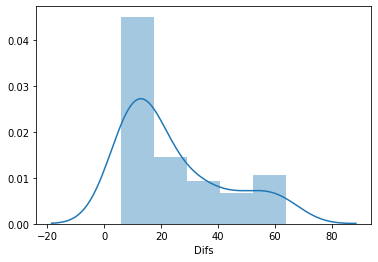

In [187]:
sns.distplot(df_focals_leap['Difs'])

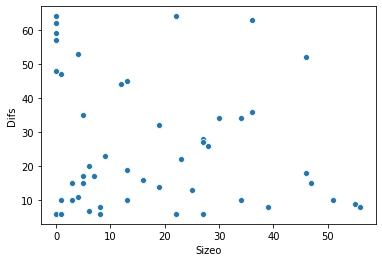

In [188]:
regiones = ['ALL', 'NOTHING']
#regiones = ['LEFT']
#regiones = ['RIGHT']
#regiones = ['BOTTOM']
sns.scatterplot(x='Sizeo', y='Difs', data=df_focals_leap[df_focals_leap['Focal'].isin(regiones)])

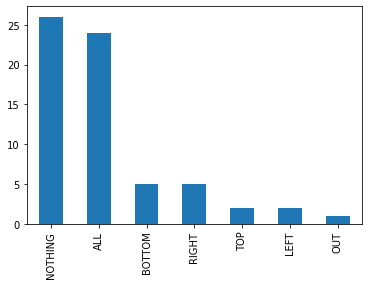

In [189]:
df_focals_leap['Focal'].value_counts().plot(kind='bar')

Se tira una moneda para elegir una región con estas probabilidades:

In [190]:
aux = pd.DataFrame(df_focals_leap['Focal'].value_counts()).reset_index()
aux.head()

,index,Focal
0,NOTHING,26
1,ALL,24
2,BOTTOM,5
3,RIGHT,5
4,TOP,2


In [192]:
regs = []
for f, grp in aux.groupby('index'):
    regs += [f]*grp['Focal'].unique()[0]

print(regs)
#choice(regs)

['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'BOTTOM', 'BOTTOM', 'BOTTOM', 'BOTTOM', 'BOTTOM', 'LEFT', 'LEFT', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'OUT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'TOP', 'TOP']


Se disminuye la distancia a esta región por el valor correspondiente a cada región:

In [17]:
aux = pd.DataFrame(df_focals_leap.groupby('Focal')['Difs'].mean()).reset_index()
aux.head()

,Focal,Difs
0,ALL,27.000000
1,BOTTOM,18.800000
2,LEFT,9.500000
3,NOTHING,25.923077
4,OUT,36.000000


In [18]:
dict_dists = dict(zip(aux['Focal'], aux['Difs']))
dict_dists

{'ALL': 27.0,
 'BOTTOM': 18.8,
 'LEFT': 9.5,
 'NOTHING': 25.923076923076923,
 'OUT': 36.0,
 'RIGHT': 14.0,
 'TOP': 11.0}

Estas son las funciones para determinar la región a explorar en el siguiente turno:

In [119]:
mod = smf.ols(formula='Dists1 ~ Dists + S_score', data=df)
res = mod.fit()
print(res.params)
pars = res.params.tolist()
print(pars)

Intercept    4.284535e+00
Dists        8.661083e-01
S_score      6.383782e-15
dtype: float64
[4.284535268708266, 0.8661082728528509, 6.38378239159465e-15]


In [140]:
mod = smf.ols(formula='Dists1 ~ Dists * S_score', data=df)
res = mod.fit()
print(res.params)
pars = res.params.tolist()
print(pars)

Intercept        9.120309
Dists            0.714990
S_score         -8.195171
Dists:S_score    0.256099
dtype: float64
[9.120308617794313, 0.714990355693916, -8.195170637775608, 0.2560990824304823]


In [206]:
def estimate_dists(region, score, overlap, pars, focals, regs, dict_dists):
    pars = [9.12, 0.715, -8.2, 0.256]
    regs = ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'BOTTOM', 'BOTTOM', 'BOTTOM', 'BOTTOM', 'BOTTOM', 'LEFT', 'LEFT', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'OUT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'TOP', 'TOP']
    dict_dists = {'ALL': 27, 'BOTTOM': 19,  'LEFT': 10, 'NOTHING': 26, 'OUT': 36, 'RIGHT': 14, 'TOP': 11}
    s_score = sigmoid(score, 10, 30)
    dists = [dist(region, f) for f in focals]
    dists = [round((pars[0] + pars[1]*x + pars[2]*s_score + pars[3]*x*s_score), 0) for x in dists]
    print("Estimated:", [int(x) for x in dists])
#    print("Min dists", min(dists))
    if min(dists) > 3:
        f = choice(regs)
        d = dict_dists[f]
        n = numberRegion(f) - 1
        print("Region para aumentar es", f, "(" + str(n) + ")", "por", d)
        dists[n] -= d
    dists = [max(0, x) for x in dists]
    print("Augmented:", [int(x) for x in dists])
    return dists

In [224]:
def get_strategy(dists):

    tiles_in_region = [0]*7
    A = int(dists[1])
    f_min = np.argmin(dists[2:6])
    f_min += 3
    if f_min in [3, 4]:
        f_min_comp = 3 if f_min == 4 else 4
        f_2_min = np.argmin(dists[4:6]) + 5
        f_2_min_comp = 5 if f_2_min == 6 else 6
    else:
        f_min_comp = 5 if f_min == 6 else 6
        f_2_min = np.argmin(dists[2:4]) + 3
        f_2_min_comp = 3 if f_2_min == 4 else 4
    print("Region más grande:", f_min, nameRegion(f_min), dists[f_min - 1])
    print("Su complemento es:", f_min_comp, nameRegion(f_min_comp))
    print("Segunda region más grande:", f_2_min, nameRegion(f_2_min))    
    print("Su complemento es:", f_2_min_comp, nameRegion(f_2_min_comp))
    if (dists[0] > dists[f_min - 1]) and (A > 32):
        print("Toda", nameRegion(f_min), "se llena")
        if nameRegion(f_min) == 'TOP':
            x = 16
            y = 16
            u = int((dists[4] / (dists[4] + dists[5])) * (A - 32))
            v = int((dists[5] / (dists[4] + dists[5])) * (A - 32))
        elif nameRegion(f_min) == 'BOTTOM':
            u = 16
            v = 16
            x = int((dists[4] / (dists[4] + dists[5])) * (A - 32))
            y = int((dists[5] / (dists[4] + dists[5])) * (A - 32))
        elif nameRegion(f_min) == 'LEFT':
            x = 16
            u = 16
            y = int((dists[3] / (dists[2] + dists[3])) * (A - 32))
            v = int((dists[2] / (dists[2] + dists[3])) * (A - 32))
        elif nameRegion(f_min) == 'RIGHT':
            y = 16
            v = 16
            x = int((dists[3] / (dists[2] + dists[3])) * (A - 32))
            u = int((dists[2] / (dists[2] + dists[3])) * (A - 32))
        else:
            print("Falta un caso A > 32")
    elif (A < 33):
        print("Se llena un pedazo de", nameRegion(f_min))
        prop_d = dists[2] / (dists[2] + dists[3])
        prop_t = dists[3] / (dists[2] + dists[3])
        prop_l = dists[4] / (dists[4] + dists[5])
        prop_r = dists[5] / (dists[4] + dists[5])
        x = int(prop_t * prop_l * A)
        y = int(prop_t * prop_r * A)
        u = int(prop_d * prop_l * A)
        v = int(prop_d * prop_r * A)
    else:
        print("ALL es más cercana!", 64 - dists[0])
        A = dists[0]
        prop_d = dists[2] / (dists[2] + dists[3])
        prop_t = dists[3] / (dists[2] + dists[3])
        prop_l = dists[4] / (dists[4] + dists[5])
        prop_r = dists[5] / (dists[4] + dists[5])
        x = 16 - int(prop_t * prop_l * A)
        y = 16 - int(prop_t * prop_r * A)
        u = 16 - int(prop_d * prop_l * A)
        v = 16 - int(prop_d * prop_r * A)
    print("x = ", x)
    print("y = ", y)
    print("u = ", u)
    print("v = ", v)
    X = list(range(0,4)) + list(range(8,12)) + list(range(16,20)) + list(range(24, 28))
    Y = list(range(4,8)) + list(range(12,16)) + list(range(20,24)) + list(range(28, 32))
    U = list(range(32,36)) + list(range(40,44)) + list(range(48,52)) + list(range(56, 60))
    V = list(range(36,40)) + list(range(44,48)) + list(range(52,56)) + list(range(60, 64))
    X = list(np.random.choice(X, x, replace=False)) if x > 0 else []
    Y = list(np.random.choice(Y, y, replace=False)) if y > 0 else []
    U = list(np.random.choice(U, u, replace=False)) if u > 0 else []
    V = list(np.random.choice(V, v, replace=False)) if v > 0 else []    
    region = X + Y + U + V
#    print(region)
    return region

In [225]:
def estimate_strategy(region, score, overlap, pars, focals, regs, dict_dists):
    s = estimate_dists(region, score, overlap, pars, focals, regs, dict_dists)
    return get_strategy(s)

In [228]:
n = 3
region = data['Region'].iloc[n]
score = data['Score'].iloc[n]
overlap = data['Overlap'].iloc[n]
regionGo = data['RegionGo'].iloc[n]
imprime_region(region)
print("Initial:", [dist(region, f) for f in focals])
print("Puntaje:", score)
print("Observed:", [dist(regionGo, f) for f in focals])
#imprime_region(overlap)
region = code2Vector(estimate_strategy(region, score, overlap, pars, focals, regs, dict_dists), 8)
print("Adjusted:", [dist(region, f) for f in focals])
imprime_region(region)

[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
Initial: [16, 48, 48, 16, 34, 30, 24, 40]
Puntaje: 27
Observed: [37, 27, 29, 35, 29, 35, 21, 43]
Estimated: [21, 43, 43, 21, 33, 31, 26, 38]
Region para aumentar es BOTTOM (2) por 19
Augmented: [21, 43, 24, 21, 33, 31, 26, 38]
Region más grande: 4 TOP 21.0
Su complemento es: 3 BOTTOM
Segunda region más grande: 6 RIGHT
Su complemento es: 5 LEFT
ALL es más cercana! 43.0
x =  11
y =  12
u =  11
v =  11
Adjusted: [19, 45, 33, 31, 33, 31, 31, 33]
[0, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 1, 1]
[1, 0, 1, 0, 1, 1, 1, 1]


In [ ]:
sns.distplot(df_focals_leap['Sizeo'], bins=50)